<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula4_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

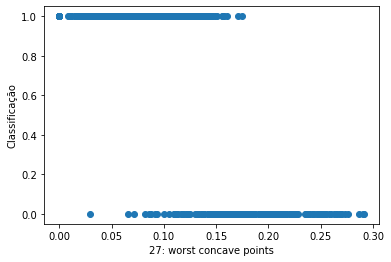

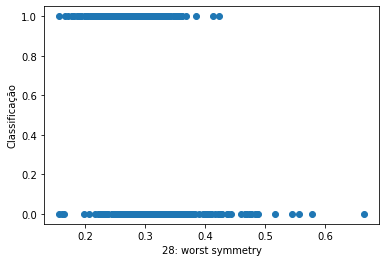

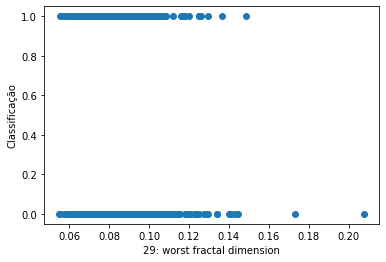

In [ ]:
import matplotlib.pyplot as plt
for i in range(27,X.shape[1]):
  plt.xlabel(f"{i}: {dataset.feature_names[i]}")
  plt.ylabel("Classificação")
  plt.scatter(X[:,i],y)
  plt.show()

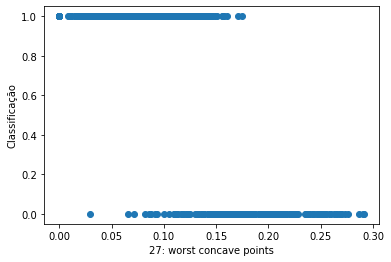

In [ ]:
X27 = X[:,27:28]
plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27,y)
plt.show()

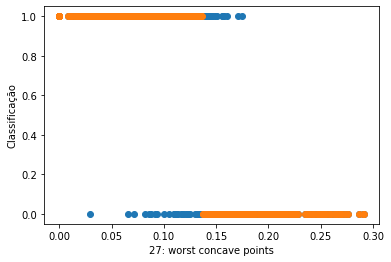

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
  def __init__(self) -> None:
    self.lrmodel = LinearRegression()
  def fit(self, X, y):
    self.lrmodel.fit(X, y)
  def predict(self, X):
    ypred = self.lrmodel.predict(X)
    ypred = (ypred>0.5).astype(int)
    return ypred

modelo = ClassificadorLinear()
modelo.fit(X27,y)
ypred = modelo.predict(X27)

plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27,y)
plt.scatter(X27,ypred)
plt.show()

In [ ]:
mean_squared_error(y, ypred)

0.08787346221441125

In [ ]:
acurácia = sum(y==ypred)/len(y)
acurácia

0.9121265377855887

In [ ]:
1-acurácia, mean_squared_error(y, ypred)

(0.08787346221441128, 0.08787346221441125)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, ypred)

0.9121265377855887

In [ ]:
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9648506151142355

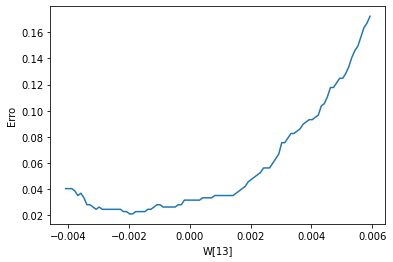

In [ ]:
import numpy as np

def plot(i, delta):
  erros = []
  coef = modelo.lrmodel.coef_[i]
  ws = np.linspace(coef-delta,coef+delta,101)
  for w in ws:
    modelo.lrmodel.coef_[i] = w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.lrmodel.coef_[i] = coef
  plt.ylabel("Erro")
  plt.xlabel(f"W[{i}]")
  plt.plot(ws, erros)
  plt.show()

plot(13, 0.005)

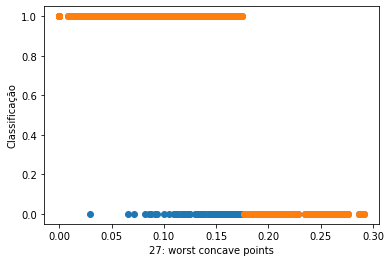

0.836555360281195

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X27,y)
ypred = modelo.predict(X27)

plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27,y)
plt.scatter(X27,ypred)
plt.show()
accuracy_score(y, ypred)

In [ ]:
modelo = LogisticRegression(solver="liblinear")
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9595782073813708

In [ ]:
from sklearn.linear_model import SGDClassifier

modelo = SGDClassifier("log")
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.8734622144112478

In [ ]:
from sklearn.linear_model import RidgeClassifier

modelo = RidgeClassifier()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9595782073813708

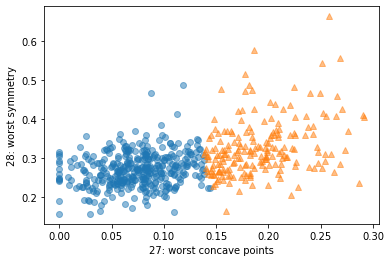

0.9086115992970123

In [ ]:
modelo = SGDClassifier()
modelo.fit(X[:,27:29],y)
ypred = modelo.predict(X[:,27:29])

plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel(f"{28}: {dataset.feature_names[28]}")

plt.plot(X[:,27][ypred==1], X[:,28][ypred==1], "o", alpha=0.5)
plt.plot(X[:,27][ypred==0], X[:,28][ypred==0], "^", alpha=0.5)

plt.show()
accuracy_score(y, ypred)

In [ ]:
modelo.coef_, modelo.intercept_

(array([[-33.69566018,  -3.03671102]]), array([5.57196402]))

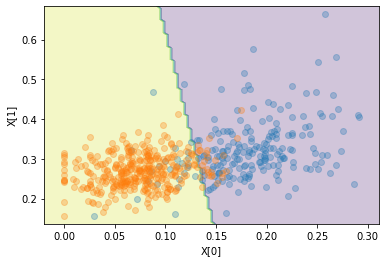

In [ ]:
import matplotlib.pyplot as plt

def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.02, np.max(X[:,0])+0.02, 100)
    x1s = np.linspace(np.min(X[:,1])-0.02, np.max(X[:,1])+0.02, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', alpha=0.3)
    plt.xlabel(f"X[0]")
    plt.ylabel(f"X[1]")
    plt.show()

plotDecisao(SGDClassifier(), X[:,27:29],y)


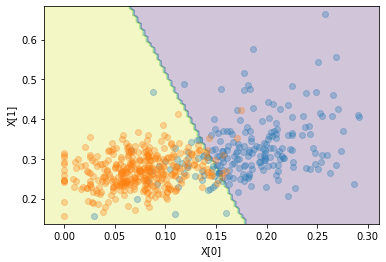

In [ ]:
plotDecisao(RidgeClassifier(), X[:,27:29],y)

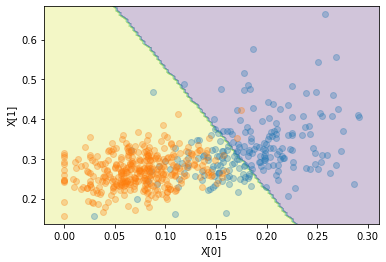

In [ ]:
plotDecisao(LogisticRegression(solver="liblinear"), X[:,27:29],y)

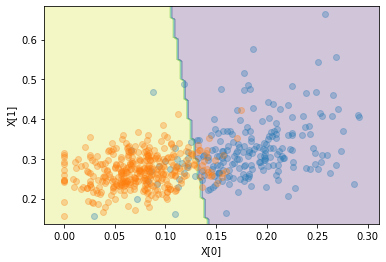

In [ ]:
class ClassificadorLinear():
  def __init__(self, learning_rate=.01, max_iter=2000):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.coef_ = np.random.uniform(-100,100,(Xb.shape[1],1))
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erro = ypred - y
      ajuste = Xb.T.dot(erro.reshape(-1,1))
      self.coef_ -= ajuste*self.learning_rate

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    ypred = Xb.dot(self.coef_)
    ypred = (ypred.reshape(-1,)>0.5).astype(int)
    return ypred


modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)
plotDecisao(ClassificadorLinear(), X[:,27:29],y)

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target
X.shape, y.shape, dataset.target_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0.62


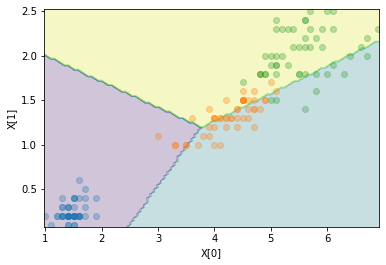

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1,
       2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import label_binarize

class ClassificadorLinear():
  def __init__(self, learning_rate=.0001, max_iter=20000):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.classes_ = sorted(list(set(y)))
    self.coef_ = np.random.uniform(-100,100,(Xb.shape[1],len(self.classes_)))
    ybin = label_binarize(y, classes=self.classes_)
    for _ in range(self.max_iter):
      ypred = Xb.dot(self.coef_)
      erro = ypred - ybin
      ajuste = Xb.T.dot(erro)
      self.coef_ -= ajuste*self.learning_rate

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    ypred = Xb.dot(self.coef_)
    ypred = np.array([self.classes_[i] for i in np.argmax(ypred,axis=1)])
    return ypred

modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))
plotDecisao(ClassificadorLinear(), X[:,2:4],y)
ypred

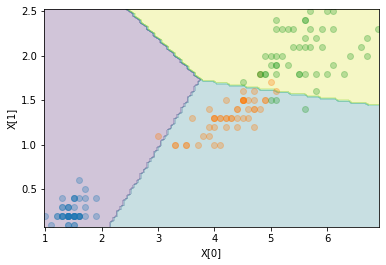

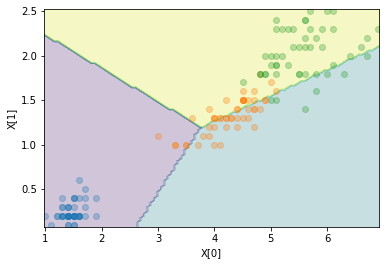

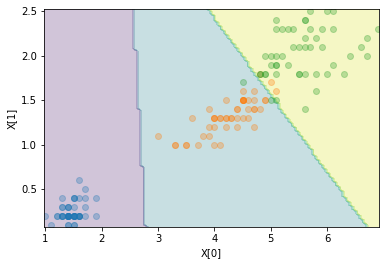

In [ ]:
plotDecisao(SGDClassifier(), X[:,2:4],y)
plotDecisao(RidgeClassifier(), X[:,2:4],y)
plotDecisao(LogisticRegression(), X[:,2:4],y)


0.8466666666666667


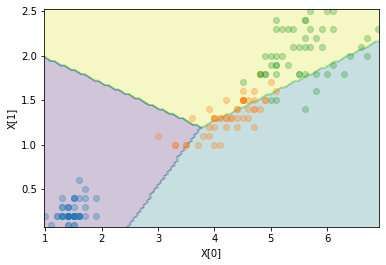

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import label_binarize
from scipy.linalg import pinv

class ClassificadorLinear():  
  def fit(self, X, y):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    self.classes_ = sorted(list(set(y)))
    self.coef_ = np.random.uniform(-100,100,(Xb.shape[1],len(self.classes_)))
    ybin = label_binarize(y, classes=self.classes_)
    self.coef_ = np.matmul(pinv(Xb), ybin)

  def predict(self, X):
    Xb = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
    ypred = Xb.dot(self.coef_)
    ypred = np.array([self.classes_[i] for i in np.argmax(ypred,axis=1)])
    return ypred

modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))
plotDecisao(ClassificadorLinear(), X[:,2:4],y)
ypred

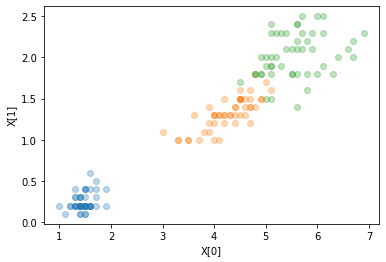

In [ ]:
def plotDataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', alpha=0.3)
    plt.xlabel(f"X[0]")
    plt.ylabel(f"X[1]")
    plt.show()

plotDataset(X[:,2:4], y)

In [ ]:
from sklearn.metrics import accuracy_score

class VizinhoMaisProximo:
  def fit(self, X, y):
    self.X = X
    self.y = y

  def distancias(self, x):
    diferenca = self.X - x
    quadrado = diferenca ** 2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz

  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancias(X[i])
      ivizinho = np.argmin(distancias)
      ypred[i] = self.y[ivizinho]
    return ypred
    
modelo = VizinhoMaisProximo()
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

1.0

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9666666666666667

In [ ]:
ntreino = int(len(y)*0.67)
X_treino, X_teste = X[:ntreino], X[ntreino:]
y_treino, y_teste = y[:ntreino], y[ntreino:]
X_treino.shape, X_teste.shape

((100, 4), (50, 4))

In [ ]:
modelo = VizinhoMaisProximo()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
accuracy_score(y_teste, ypred)

0.0

In [ ]:
y_treino, y_teste

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]))

In [ ]:
from numpy.random import shuffle
ishuffle = np.array(list(range(len(y))))
shuffle(ishuffle)
print(ishuffle)
print(type(ishuffle))

[136   4 121  25 117 149 118  85   7 143 126 128  45  46 137   8   3  99
 123  49  50  16  83  32  75  63  90  58 133   1  55 113  52  22  96  43
 108  17  93  39 124 132  42  12 103 114 111  47  11  67  54  64  19 122
   5  18  95 110  74  48  77 109  78  98  61 101  89 119  30  73 148 102
 106  69 104  92 120 135 115  15 141  65   0 129 125  37  20  13  82  56
 134 131 105  40  71  57  84  33  28  29   2  21 146 107 116  81  62  51
  44 130  80  88  60  24  34 142  97 138  70  59  86 112  27  76   9 139
  10   6  41  72 147  31 144  36  14 127  87  91 100  53  79 140  38 145
  68  26  94  66  35  23]
<class 'numpy.ndarray'>


In [ ]:
ntreino = int(len(y)*0.67)
X_treino, X_teste = X[ishuffle[:ntreino]], X[ishuffle[ntreino:]]
y_treino, y_teste = y[ishuffle[:ntreino]], y[ishuffle[ntreino:]]
X_treino.shape, X_teste.shape

((100, 4), (50, 4))

In [ ]:
y_treino, y_teste

(array([0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0,
        2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1,
        0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2,
        2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2,
        1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2]),
 array([1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0,
        1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0,
        0, 1, 0, 0, 1, 0]))

In [ ]:
modelo = VizinhoMaisProximo()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
accuracy_score(y_teste, ypred), ypred.shape, ypred==y_teste

(1.0,
 (50,),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]))

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)
y_treino, y_teste

(array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
        2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
        2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
        1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
        1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0, 1, 2, 2, 1, 2]))

In [ ]:
modelo = VizinhoMaisProximo()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
accuracy_score(y_teste, ypred), ypred.shape, ypred==y_teste

(0.98,
 (50,),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True]))

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=11)
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
accuracy_score(y_teste, ypred), ypred.shape, ypred==y_teste

(1.0,
 (50,),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]))